In [0]:
from pickle import load, dump
from keras.utils import plot_model
from keras.models import Model
from keras.layers import *
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier
import random
from numpy import array

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
 
# load a pre-defined list of photo identifiers
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split(' ')[0]
        dataset.append(identifier)
    return set(dataset)

# load photo features
def load_video_features(filename, dataset):
    # load all features
    all_features = load(open(filename, 'rb'))
    # filter features
    features = {k: all_features[k][:256] for k in dataset}
    return features

In [84]:
#load training dataset (6K)
filename = 'drive/My Drive/Final Year Project/Descriptions/trainuc.txt'
train = load_set(filename)
print('Train: %d' % len(train))
#load training dataset (6K)
filename = 'drive/My Drive/Final Year Project/Descriptions/testuc.txt'
test = load_set(filename)
print('Test: %d' % len(test))
'''
#load c2d features
train_vid_features = load_video_features('dataset_one_hot_train.pkl', train)
print('C2D: train=%d' % len(train_vid_features))

#load c2d features
test_vid_features = load_video_features('dataset_one_hot_test.pkl', test)
print('C2D: train=%d' % len(test_vid_features))
class_label=load(open('/home/mh/mywork/dataset/MSVD/features/class_features/msvd_video_class_label_6.pkl','rb'))

#load c2d features
train_vid_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/msvd_sem_scn_300.pkl', train)
print('C2D: train=%d' % len(train_vid_features))

#load c2d features
test_vid_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/msvd_sem_scn_300.pkl', test)
print('C2D: train=%d' % len(test_vid_features))

'''
#load c2d features
train_vid_features = load_video_features('drive/My Drive/Final Year Project/Features/features_uc_resnet152_updated.pkl', train)

print('Loaded: train=%d' % len(train_vid_features))

#load c2d features
test_vid_features = load_video_features('drive/My Drive/Final Year Project/Features/features_uc_resnet152_updated.pkl', test)
print('Loaded: test=%d' % len(test_vid_features))
class_label=load(open('drive/My Drive/Final Year Project/Features/dataset_one_hot_uc.pkl','rb'))


#print(train_vid_features['05_010'])

Xtrain=list()
Ytrain=list()
for i in train_vid_features:
    Xtrain.append(train_vid_features[i][0])
    #print(i)
    #x = i.split('_')[0]
    Ytrain.append(class_label[i])

print(Xtrain[0])
Xtrain=np.array(Xtrain)
print(Xtrain.shape)

print(Ytrain[0])
Ytrain=np.array(Ytrain)
print(Ytrain.shape)

Xtest = list()
Ytest = list()
for i in test_vid_features:
    Xtest.append(test_vid_features[i][0])
    Ytest.append(class_label[i])

Xtest=np.array(Xtest)
print(Xtest.shape)

Ytest=np.array(Ytest)
print(Ytest.shape)


'''
Xtest=list()
Ytest=list()
for i in test_vid_features:
    Xtest.append(test_vid_features[i][0])
    Ytest.append(class_label[i])

Xtest=np.array(Xtest)
print(Xtest.shape)
Ytest=np.array(Ytest)
print(Ytest.shape)

#load c2d features
train_c2d_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/vlad/msvd_resnet152_vlad_features_k_100.pkl', train)
print('C2D: train=%d' % len(train_c2d_features))

#load c3d features
train_c3d_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/vlad/msvd_c3d_vlad_features_k_100.pkl', train)
print('C3D: train=%d' % len(train_c3d_features))

#load semantic features
train_semantic_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/msvd_sem_scn_300.pkl', train)
print('Semantic: train=%d' % len(train_semantic_features))

Xtrain=list()
Ytrain=list()
for i in train_c2d_features:
    c2d=np.array(train_c2d_features[i])
    c3d=np.array(train_c3d_features[i])
    sem=np.array(train_semantic_features[i])
    Xtrain.append(np.concatenate((c2d,c3d,sem),axis=0))
    Ytrain.append(Ytrain_label[i])

Xtrain=np.array(Xtrain)
print(Xtrain.shape)
Ytrain=np.array(Ytrain)
print(Ytrain.shape)

Xtest=list()
Ytest=list()
for i in test_c2d_features:
    c2d=np.array(test_c2d_features[i])
    c3d=np.array(test_c3d_features[i])
    sem=np.array(test_semantic_features[i])
    Xtest.append(np.concatenate((c2d,c3d,sem),axis=0))
    Ytest.append(Ytest_label[i])

Xtest=np.array(Xtest)
print(Xtest.shape)
Ytest=np.array(Ytest)
print(Ytest.shape)
'''

Train: 1260
Test: 420
Loaded: train=1260
Loaded: test=420
[0.         0.         4.722057   ... 0.18885204 0.         0.01814269]
(1260, 2048)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1260, 21)
(420, 2048)
(420, 21)


"\nXtest=list()\nYtest=list()\nfor i in test_vid_features:\n    Xtest.append(test_vid_features[i][0])\n    Ytest.append(class_label[i])\n\nXtest=np.array(Xtest)\nprint(Xtest.shape)\nYtest=np.array(Ytest)\nprint(Ytest.shape)\n\n#load c2d features\ntrain_c2d_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/vlad/msvd_resnet152_vlad_features_k_100.pkl', train)\nprint('C2D: train=%d' % len(train_c2d_features))\n\n#load c3d features\ntrain_c3d_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/vlad/msvd_c3d_vlad_features_k_100.pkl', train)\nprint('C3D: train=%d' % len(train_c3d_features))\n\n#load semantic features\ntrain_semantic_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/msvd_sem_scn_300.pkl', train)\nprint('Semantic: train=%d' % len(train_semantic_features))\n\nXtrain=list()\nYtrain=list()\nfor i in train_c2d_features:\n    c2d=np.array(train_c2d_features[i])\n    c3d=np.array(train_c3d_features[i])\n    sem=np.array(train

In [54]:
features1 = load(open('dataset_one_hot_newids.pkl','rb'))
print((features1.keys()))

FileNotFoundError: ignored

In [85]:

# data generator, intended to be used in a call to model.fit_generator()
def data_generator(X,Y,batch_size):
    # loop for ever over images
    batch_features = np.zeros((batch_size, 830))
    batch_labels = np.zeros((batch_size,14))
    while 1:
        for i in range(batch_size):
            # choose random index in features
            index= random.choice(list(X.keys()))
            batch_features[i] = X[index]
            batch_labels[i] = Y[index]
        yield batch_features, batch_labels
'''

# data generator, intended to be used in a call to model.fit_generator()
def data_generator(train_c2d, train_c3d, train_sem,y_label):
    X1, X2, X3, y = list(), list(), list(), list()
    # loop for ever over images
    while 1:
        for key, desc_list in train_c2d.items():
            # retrieve the photo feature
            c2d= train_c2d[key]
            X1.append(c2d)
            c3d= train_c3d[key]
            X2.append(c3d)
            sem=train_sem[key]
            X3.append(sem)
            y.append(y_label[key])
            #print(len(photo))
            yield [[array(X1), array(X2), array(X3)], array(y)]
'''

'\n\n# data generator, intended to be used in a call to model.fit_generator()\ndef data_generator(train_c2d, train_c3d, train_sem,y_label):\n    X1, X2, X3, y = list(), list(), list(), list()\n    # loop for ever over images\n    while 1:\n        for key, desc_list in train_c2d.items():\n            # retrieve the photo feature\n            c2d= train_c2d[key]\n            X1.append(c2d)\n            c3d= train_c3d[key]\n            X2.append(c3d)\n            sem=train_sem[key]\n            X3.append(sem)\n            y.append(y_label[key])\n            #print(len(photo))\n            yield [[array(X1), array(X2), array(X3)], array(y)]\n'

In [0]:
# define baseline model
def baseline_model():
    # feature extractor model
    inputs1 = Input(shape=(2048,))
    #fe1 = Dropout(0.2)(inputs1)
    fe1 = Dense(256, activation='relu')(inputs1)
    #print(fe1)
    outputs = Dense(21, activation='softmax')(fe1)
    # tie it together [image, seq] [word]
    model = Model(inputs=inputs1, outputs=outputs)
        # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize model
    model.summary()
    plot_model(model, to_file='drive/My Drive/Final Year Project/modeluc/model_classify_domain.png', show_shapes=True)
    return model

In [87]:
model=baseline_model()
epochs = 50
batch_size=1260
steps=len(train_vid_features)
#print(i)
    
    # create the data generator
    #generator = data_generator(train_vid_features,Ytrain_label,batch_size)
    # fit for one epoch
    #model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    # model.evaluate_generator(generator=valid_generator)
history = model.fit(Xtrain, Ytrain,validation_split=0.20, batch_size=batch_size, epochs=150)
    # save model
model.save('drive/My Drive/Final Year Project/modeluc/model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 2048)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               524544    
_________________________________________________________________
dense_42 (Dense)             (None, 21)                5397      
Total params: 529,941
Trainable params: 529,941
Non-trainable params: 0
_________________________________________________________________
Train on 1008 samples, validate on 252 samples
Epoch 1/150
1008/1008 [==============================] - 1s 1ms/step - loss: 3.6959 - acc: 0.0476 - val_loss: 2.6783 - val_acc: 0.2619
Epoch 2/150
1008/1008 [==============================] - 0s 66us/step - loss: 2.5414 - acc: 0.2609 - val_loss: 2.0029 - val_acc: 0.4563
Epoch 3/150
1008/1008 [==============================] - 0s 63us/step - loss: 1.78

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


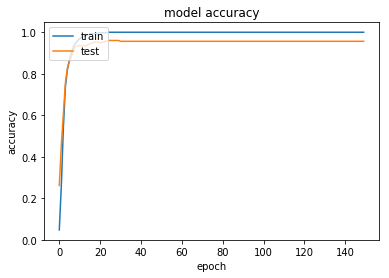

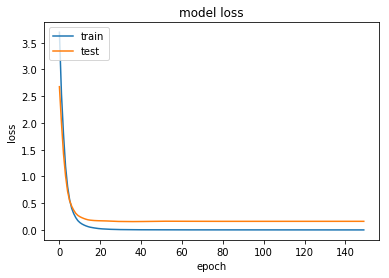

In [89]:
# Visualize training history
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('drive/My Drive/Final Year Project/modeluc/accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('drive/My Drive/Final Year Project/modeluc/loss.png')
plt.show()

# Evaluation

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from keras.models import load_model
import matplotlib.pyplot as plt

In [0]:
'''
model = load_model('/home/mh/mywork/classification/model_classify/model_4.h5')

Ytest_label = load(open('/home/mh/mywork/dataset/MSVD/features/class_features/msvd_video_class_label_test.pkl', 'rb'))
filename = '/home/mh/mywork/dataset/MSVD/new_testID.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))

#load c2d features
test_c2d_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/vlad/msvd_resnet152_vlad_features_k_100.pkl', test)
print('C2D: test=%d' % len(test_c2d_features))

#load c3d features
test_c3d_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/vlad/msvd_c3d_vlad_features_k_100.pkl', test)
print('C3D: test=%d' % len(test_c3d_features))

#load semantic features
test_semantic_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/msvd_sem_scn_300.pkl', test)
print('Semantic: test=%d' % len(test_semantic_features))
'''

"\nmodel = load_model('/home/mh/mywork/classification/model_classify/model_4.h5')\n\nYtest_label = load(open('/home/mh/mywork/dataset/MSVD/features/class_features/msvd_video_class_label_test.pkl', 'rb'))\nfilename = '/home/mh/mywork/dataset/MSVD/new_testID.txt'\ntest = load_set(filename)\nprint('Dataset: %d' % len(test))\n\n#load c2d features\ntest_c2d_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/vlad/msvd_resnet152_vlad_features_k_100.pkl', test)\nprint('C2D: test=%d' % len(test_c2d_features))\n\n#load c3d features\ntest_c3d_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/vlad/msvd_c3d_vlad_features_k_100.pkl', test)\nprint('C3D: test=%d' % len(test_c3d_features))\n\n#load semantic features\ntest_semantic_features = load_video_features('/home/mh/mywork/dataset/MSVD/features/msvd_sem_scn_300.pkl', test)\nprint('Semantic: test=%d' % len(test_semantic_features))\n"

In [0]:

model = load_model('drive/My Drive/Final Year Project/modelcom/model_01_077.h5')
#features=load(open('features_resnet152_combined.pkl','rb'))
#print(len(features))

#accuracy for test
predictions=list()
pr_test=dict()
y_label=list()
count=0
for i in test_vid_features:
    #print(i)
    x_n=np.array([test_vid_features[i]][0])
    #score = model.evaluate(x, y, batch_size=batch_size)
    preds=model.predict([x_n])
    labels = np.argmax(preds, axis=-1) 
    predictions.append(labels[0])
    y_label.append(class_label[i])
    pr_test[count]=i
    count+=1
    
predictions_test=np.array(predictions)
ytest=np.array(y_label)
pred_label = preprocessing.LabelBinarizer()
test_predicted_label=pred_label.fit_transform(predictions_test)

Ytest=Ytest.astype(int)

#accuracy for train:
predictions=list()
pr_train=dict()
y_label=list()
count=0
for i in train_vid_features:
    #print(i)
    x_n=np.array(train_vid_features[i])
    
    #score = model.evaluate(x, y, batch_size=batch_size)
    preds=model.predict([x_n])
    labels = np.argmax(preds, axis=-1) 
    predictions.append(labels[0])
    y_label.append(class_label[i])
    pr_train[count]=i
    count+=1
    
predictions_train=np.array(predictions)
ytrain=np.array(y_label)
pred_label = preprocessing.LabelBinarizer()
train_predicted_label=pred_label.fit_transform(predictions_train)

Ytrain=Ytrain.astype(int)

In [0]:
print((predictions_train))

[ 6  3  9  0  3  3  3  3 11  3  6 12  0  8  3 11  0  3  2  0 11 12  9  3
  3  6  1  9  6  2  9  3  2  7  4  8  9  0  0  3 11  9  4  0  6  6  9  9
  0  0  7  0 11  0  9  9  0 11  6  0  3  0  0  9  9  1  4  3  0  8 11 11
  3  3  9  0  6  3  9 12  9  6  0 11  4  9  0  8  0  0  9  0  8  6  9 12
  3  4  9 12 11  3  3 12  8  1  6  8  6  8 11  9  0  6  2  0  2  3  6  0
  3  9  8  6  8  3  8  8  2  8  6  6  0  2  3 11 11  4  9 12  2 12  0 11
  0  6  8  3  3 11  6 11  3  3 12  2 11  3  6  2  9  9 12 11  3  8  0  0
  9  0  7  6  8  3  6 11  8  9  0  2  0  9  0 12  0  9  6 11  0  8  8  9
  3 12  6  9  8  8  8  8  0  3  0  0  3 12  3  0  2  3  8  6  8  9 12  3
  3 12  3  9 12  0  9  0 11 11 12  0  9  6 11 11  8  6  9  2  3  0  3 12
 11  6  8  6  9  0  0  9  0  3  6  9  8  0  0  9  0 11  3  2  3  9  0  4
  9  9  6 11  9  3  3  0  8  2 12  8  0  0  0  3 12  0  0 11  6  0  0  8
  0  8  3  2  8  3  3  9  8  4  2  8  0 11 11  9 12  3 11  0  0 12  8  8
  3  4  3  3  3  0  3  8  3  8 12  8  6  2  2  4  3

In [72]:
cm = confusion_matrix(Ytest.argmax(axis=1), test_predicted_label.argmax(axis=1))
print(cm)

print("Accuracy = ",accuracy_score(Ytest.argmax(axis=1), test_predicted_label.argmax(axis=1)))
print("Accuracy = ",accuracy_score(Ytrain.argmax(axis=1), train_predicted_label.argmax(axis=1)))

[[20  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Accuracy =  0.5446808510638298
Accuracy =  0.6397129186602871


In [0]:
#to create domain feature vector
model = load_model('modeluc1/model_49.h5')
features=load(open('../features_uc_resnet152_updated.pkl','rb'))
predictions=dict()
for i in features:
    #print(i)
    x_n=np.array(features[i])
    #score = model.evaluate(x, y, batch_size=batch_size)
    preds=model.predict([x_n])
    predictions[i]=preds[0]
    
print(predictions['10_077'])
dump(predictions,open('domain_features.pkl','wb'))

[1.63235701e-08 3.00257454e-07 4.29959712e-08 2.32564631e-07
 8.15465537e-05 6.55176535e-08 4.59209296e-05 1.40666785e-07
 2.28344965e-09 1.27905736e-07 9.99836683e-01 1.09064175e-07
 1.87487927e-08 8.57932628e-06 1.10725651e-08 8.53276015e-06
 1.68318945e-06 3.89056112e-08 6.75840894e-09 1.18643477e-07
 1.58996609e-05]


In [0]:
fea=load(open('domain_features.pkl','rb'))
print(fea)

{'18_041': array([1.03630255e-12, 2.73177592e-10, 1.04965485e-08, 1.91832037e-13,
       1.05124860e-10, 6.28086667e-13, 1.88563886e-13, 1.37813164e-10,
       2.03364614e-09, 1.53575008e-09, 1.98843286e-12, 5.49098056e-09,
       1.47964502e-10, 2.95241193e-11, 8.11986044e-14, 1.79237593e-14,
       1.08459517e-08, 8.70447533e-11, 9.99999762e-01, 5.13202068e-08,
       2.16986692e-07], dtype=float32), '12_083': array([2.0883300e-08, 1.0220871e-05, 6.1742671e-06, 1.9775495e-08,
       6.7681685e-05, 3.4463119e-07, 1.6348882e-01, 7.4441328e-07,
       5.0830238e-08, 9.7415054e-09, 4.4829713e-07, 3.0635141e-03,
       8.2600707e-01, 3.5957317e-03, 5.0901866e-07, 3.0030744e-06,
       3.8640246e-07, 7.9251109e-08, 2.6372307e-05, 3.1576616e-05,
       3.6972601e-03], dtype=float32), '03_049': array([1.0821500e-08, 1.6638801e-12, 5.3166249e-11, 9.9999166e-01,
       6.5063879e-12, 1.9632120e-09, 4.9897955e-14, 6.1202182e-10,
       2.8719155e-10, 4.4897615e-08, 6.9615515e-11, 1.0924091e-12,

In [0]:
train_acc_x=np.zeros((15,1))
train_acc_y=np.zeros((15,1))
test_acc_x=np.zeros((15,1))
test_acc_y=np.zeros((15,1))
c=0
for j in range(15,20,1):
    print(j)
    model = load_model('/home/mh/mywork/classification/model_classify_categoryloss/model_' + str(j) + '.h5')
    predictions=list()
    count=0
    for i in train_vid_features:
        #print(i)
        x_n=np.array(train_vid_features[i])
        #score = model.evaluate(x, y, batch_size=batch_size)
        preds=model.predict([x_n])
        labels = np.argmax(preds, axis=-1) 
        predictions.append(labels[0])
    predictions=np.array(predictions)
    pred_label = preprocessing.LabelBinarizer()
    predicted_label=pred_label.fit_transform(predictions)
    Ytrain=Ytrain.astype(int)
    train_acc_x[c]=c
    train_acc_y[c]=accuracy_score(Ytrain.argmax(axis=1), predicted_label.argmax(axis=1))
    predictions=list()
    count=0
    for i in test_vid_features:
        #print(i)
        x_n=np.array(test_vid_features[i])
        #score = model.evaluate(x, y, batch_size=batch_size)
        preds=model.predict([x_n])
        labels = np.argmax(preds, axis=-1) 
        predictions.append(labels[0])
    predictions=np.array(predictions)
    pred_label = preprocessing.LabelBinarizer()
    predicted_label=pred_label.fit_transform(predictions)
    Ytest=Ytest.astype(int)
    test_acc_x[c]=c
    test_acc_y[c]=accuracy_score(Ytest.argmax(axis=1), predicted_label.argmax(axis=1))
    c+=1

15
16
17
18
19


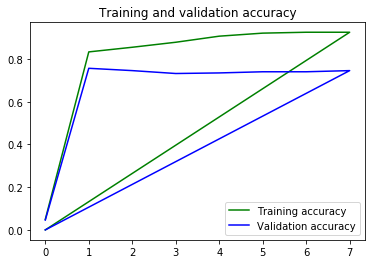

In [0]:
plt.figure()

plt.plot(train_acc_x, train_acc_y, 'g', label='Training accuracy')
plt.plot(test_acc_x, test_acc_y, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [0]:
print(train_acc_y)
print(test_acc_y)

[[0.82274247]
 [0.82274247]
 [0.8277592 ]
 [0.8277592 ]
 [0.83026756]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
[[0.76422764]
 [0.76422764]
 [0.76151762]
 [0.75880759]
 [0.75609756]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [0]:
model = load_model('/home/mh/mywork/classification/model_classify_categoryloss/model_8.h5')
features=load(open('/home/mh/mywork/dataset/MSVD/features/class_features/msvd_caption_features.pkl','rb'))
#load training dataset (6K)
filename = '/home/mh/mywork/dataset/MSVD/all_video_ID.txt'
vid = load_set(filename)

In [0]:
#accuracy for train:
predictions=list()
pr_vid=dict()
y_label=list()
count=0
for i in features:
    #print(i)
    x_n=np.array(features[i])
    
    #score = model.evaluate(x, y, batch_size=batch_size)
    preds=model.predict([x_n])
    labels = np.argmax(preds, axis=-1) 
    predictions.append(labels[0])
    pr_vid[count]=i
    count+=1

predictions_train=np.array(predictions)
pred_label = preprocessing.LabelBinarizer()
predicted_label=pred_label.fit_transform(predictions)

print(len(pr_vid))
new_label=dict()
for i in range(len(vid)):
    new_label[pr_vid[i]]=predicted_label[i]

dump(new_label,open('msvd_class_weights_category.pkl','wb'))

1961


In [0]:
#get new class ids
from numpy import argmax
class_map={0:'actions',1:'animal',2:'cook',3:'music',4:'ride',5:'simpleactions'}
#train
train_domain=dict()
for c in class_map:
    train_domain[c]=list()
for i in Ytrain_label:
    class_label=argmax(Ytrain_label[i])
    train_domain[class_label].append(i)
    
#test
test_domain=dict()
for c in class_map:
    test_domain[c]=list()
for i in Ytest_label:
    class_label=argmax(Ytest_label[i])
    test_domain[class_label].append(i)
    
    
dump(train_domain,open('cluster_domain_train_ids.pkl','wb'))
dump(test_domain,open('cluster_domain_test_ids.pkl','wb'))

In [0]:
print(train_domain[0])

['E2r6nnkwl0c_6_18', 'Gn4Iv5ARIXc_37_40', '2YhDTpzxd3c_45_49', 'K2LxyytY3Dw_104_112', '4lXdVS697DQ_10_25', '0bSz70pYAP0_5_15', 'tn-Hoz4KbkE_89_93', 'cs33MNhpRNw_16_21', 'idXJu0BQRvo_2_6', 'b71bI0rH1g8_75_90', '5dZ8PXABC30_14_20', '-DRy7rBg0IQ_31_37', 'tZmDWltBziM_42_47', 'vloe_60s_dk_0_9', 'dc4UltkRJsw_53_59', 'VU4qLrk5axA_40_58', 'SaYwh6chmiw_15_40', 'tZmDWltBziM_70_80', 'eroAmLZ85DI_28_35', 'lc9bA-hvqHU_1_6', 'ljGcQocjSs4_38_60', 'MoqC84sXu88_47_59', 'TIubRrkku-4_1_10', 'DB-3-TVjrxU_58_75', 'qIk_Dz5XE5E_104_109', 'pzq5fPfsPZg_145_160', 'CHFXTeQWXjo_206_212', '62I8I4sCPPQ_12_30', 'Kf8oZGHDTt4_4_13', 'pqTWUzehCUM_42_47', 'I9gLTZY1ouc_142_147', 'hEOGZoYSvT4_82_86', 'ri5AyXzxb4o_201_215', 'H7vezmDeZaw_2_7', 'J8cP93yG1Ao_14_24', 'JIoiUNOXGaI_98_104', 'Ffv7fhL1EDY_177_184', '9WpJxn-2h1o_122_150', '2YhDTpzxd3c_98_101', '5W02895vT8c_312_322', 'vuvpbeQak9Q_23_29', 'D1tTBncIsm8_198_205', '30GeJHYoerk_63_75', '2YhDTpzxd3c_115_120', 'MJoxGpEswOI_9_16', 'v-9Gx0gJmfo_26_32', 'zSPBC8EO6dY_64_73', '